# PROYECTO CIENCIA DE DATOS  
## INTEGRANTES:  
    Carlos Stiven Ruiz  
    Jhonny fernando duque   
    Santiago Reyes


## PUNTO 1
### EXPLORACIÓN Y ANÁLISIS DESCRIPTIVO

In [1]:
import pandas as pd
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c:\Users\jhonn\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
## Eliminación de la columna Unnamed

df = df.drop(columns=['Unnamed: 0'])


In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.describe()
print(df.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [6]:
df.select_dtypes('number')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


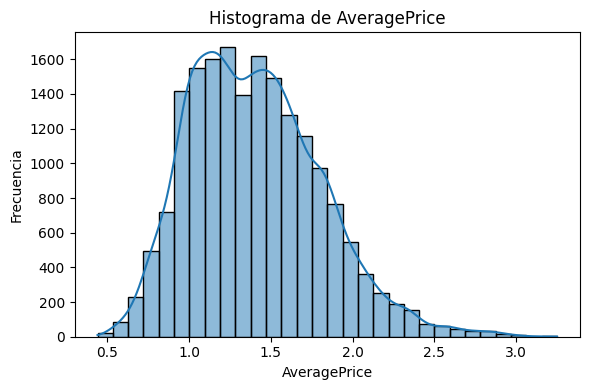

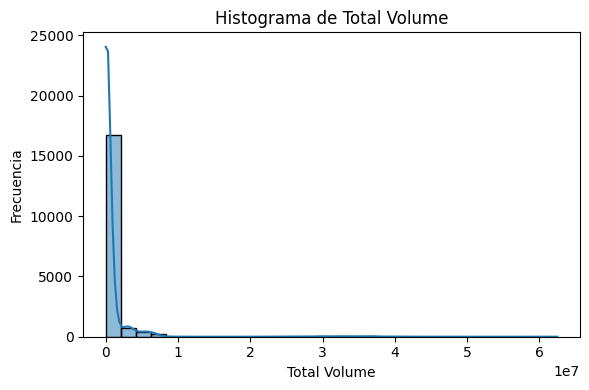

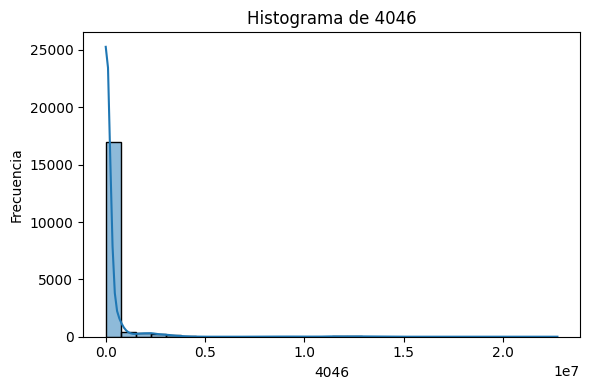

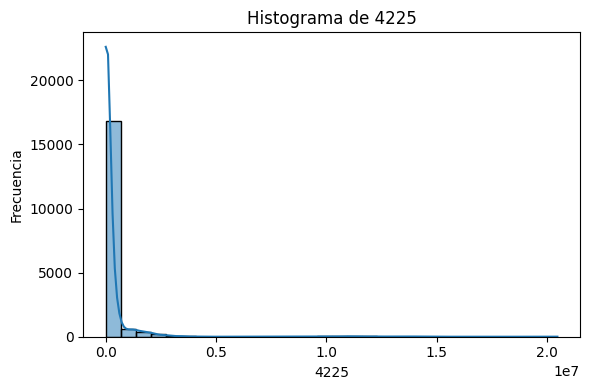

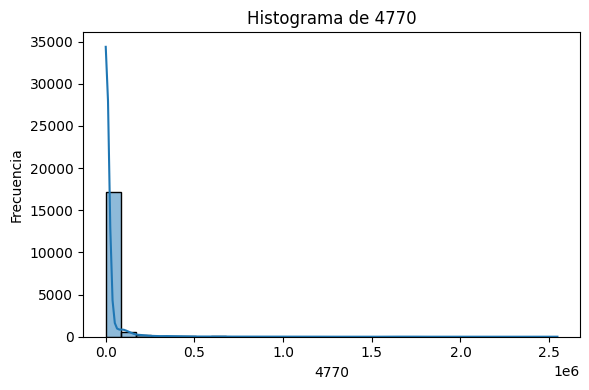

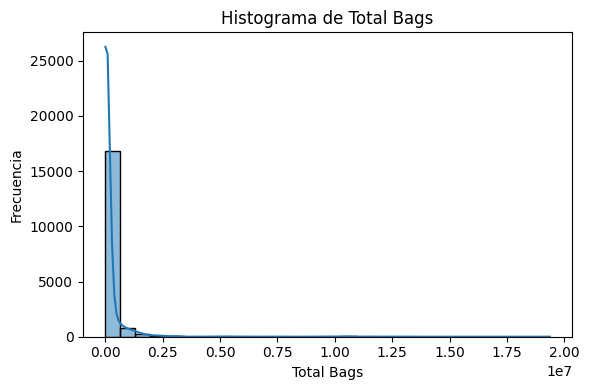

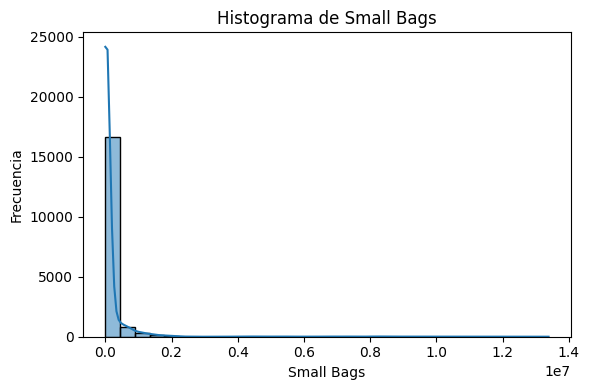

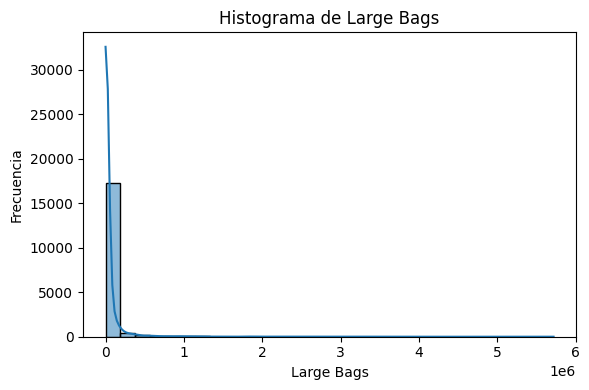

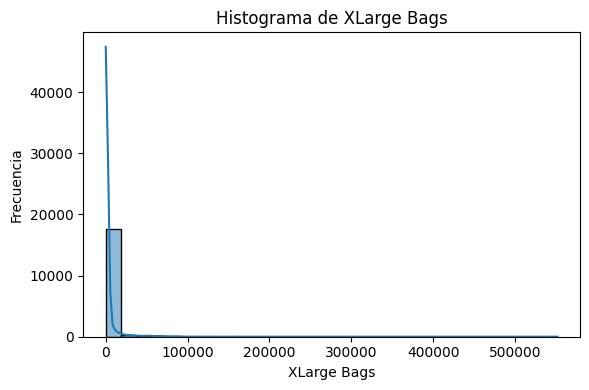

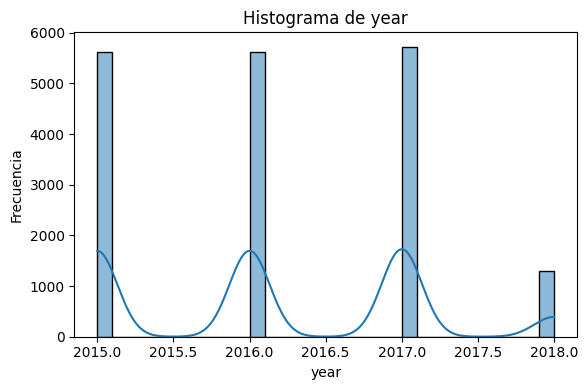

In [7]:
variables_numericas = df.select_dtypes(include='number').columns

for col in variables_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Visualizamos cuantas regiones hay dispom

In [9]:
(df['region'].unique())

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
#El ordenamiento es por semanas, de Domingo a Domingo
sorted(df['Date'].unique())


['2015-01-04',
 '2015-01-11',
 '2015-01-18',
 '2015-01-25',
 '2015-02-01',
 '2015-02-08',
 '2015-02-15',
 '2015-02-22',
 '2015-03-01',
 '2015-03-08',
 '2015-03-15',
 '2015-03-22',
 '2015-03-29',
 '2015-04-05',
 '2015-04-12',
 '2015-04-19',
 '2015-04-26',
 '2015-05-03',
 '2015-05-10',
 '2015-05-17',
 '2015-05-24',
 '2015-05-31',
 '2015-06-07',
 '2015-06-14',
 '2015-06-21',
 '2015-06-28',
 '2015-07-05',
 '2015-07-12',
 '2015-07-19',
 '2015-07-26',
 '2015-08-02',
 '2015-08-09',
 '2015-08-16',
 '2015-08-23',
 '2015-08-30',
 '2015-09-06',
 '2015-09-13',
 '2015-09-20',
 '2015-09-27',
 '2015-10-04',
 '2015-10-11',
 '2015-10-18',
 '2015-10-25',
 '2015-11-01',
 '2015-11-08',
 '2015-11-15',
 '2015-11-22',
 '2015-11-29',
 '2015-12-06',
 '2015-12-13',
 '2015-12-20',
 '2015-12-27',
 '2016-01-03',
 '2016-01-10',
 '2016-01-17',
 '2016-01-24',
 '2016-01-31',
 '2016-02-07',
 '2016-02-14',
 '2016-02-21',
 '2016-02-28',
 '2016-03-06',
 '2016-03-13',
 '2016-03-20',
 '2016-03-27',
 '2016-04-03',
 '2016-04-

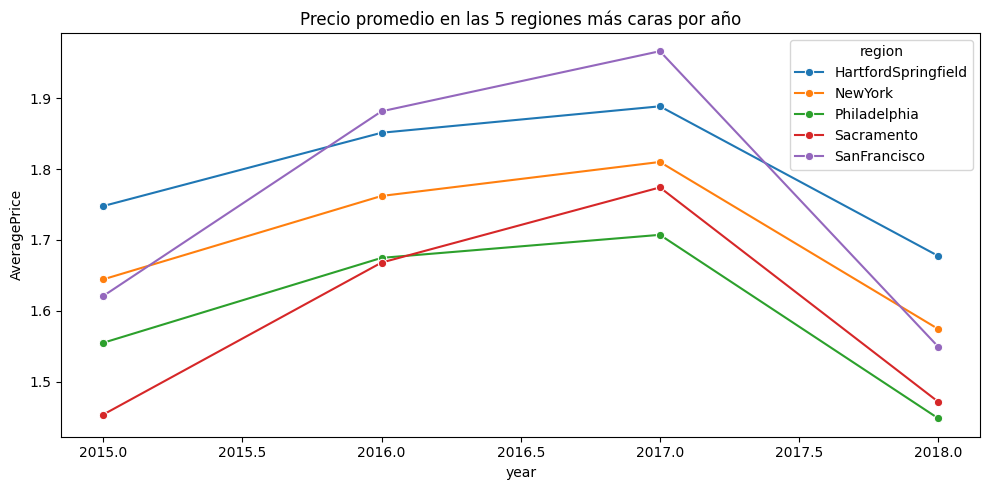

In [11]:
# Promedio general de las 5 regiones mas caras

top_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(5).index

subset = df[df['region'].isin(top_regions)]
grouped = subset.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='year', y='AveragePrice', hue='region', marker='o')
plt.title('Precio promedio en las 5 regiones más caras por año')
plt.tight_layout()
plt.show()


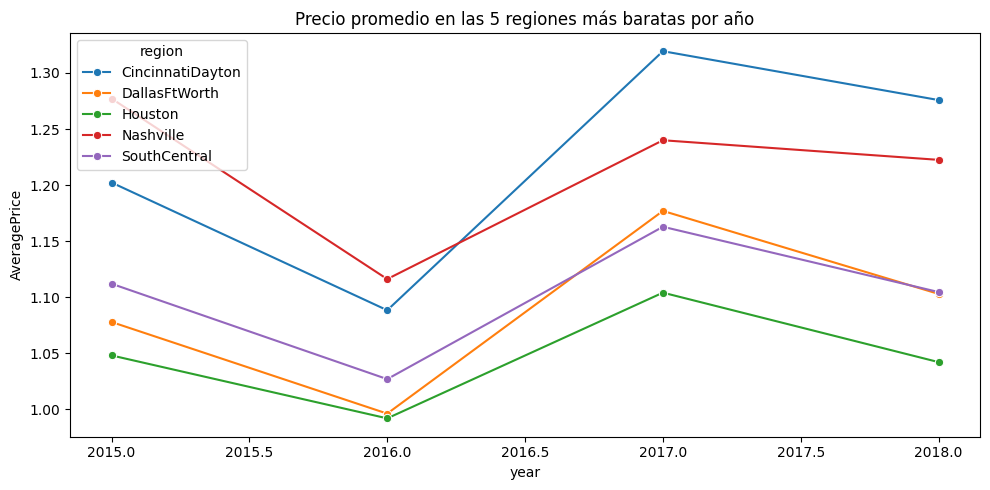

In [12]:
## Promedio general de las 5 Regiones más baratas
lower_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=True).head(5).index

subset = df[df['region'].isin(lower_regions)]
grouped = subset.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='year', y='AveragePrice', hue='region', marker='o')
plt.title('Precio promedio en las 5 regiones más baratas por año')
plt.tight_layout()
plt.show()


In [13]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
(df['region'])

df[df['region'] == 'TotalUS']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS
18221,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS
18222,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS
18223,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS


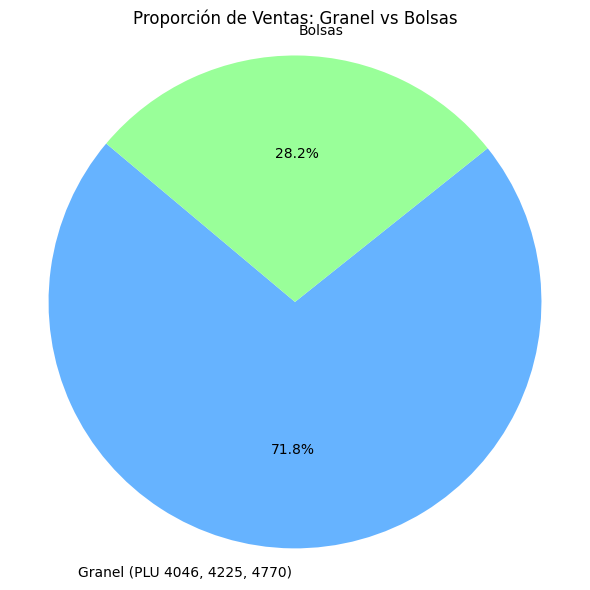

In [15]:
#Proporcion en ventas entre aguacate a granel vs en bolsitas

granel_total = df['4046'].sum() + df['4225'].sum() + df['4770'].sum()
bolsas_total = df['Total Bags'].sum()

valores = [granel_total, bolsas_total]
etiquetas = ['Granel (PLU 4046, 4225, 4770)', 'Bolsas']

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Ventas: Granel vs Bolsas')
plt.axis('equal') 
plt.tight_layout()
plt.show()


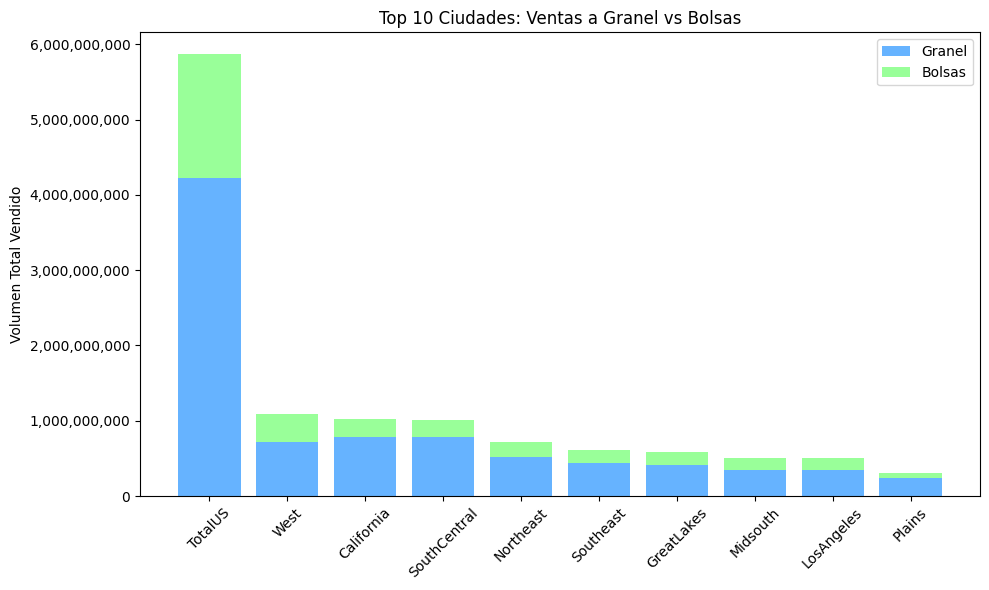

In [16]:
## Proporción en ventas entre aguacate a granel vs en bolsitas por región en las 10 regiones con más ventas
ventas_por_region = df.groupby('region').agg({
    '4046': 'sum',
    '4225': 'sum',
    '4770': 'sum',
    'Total Bags': 'sum'
}).reset_index()

ventas_por_region['Granel'] = ventas_por_region['4046'] + ventas_por_region['4225'] + ventas_por_region['4770']
ventas_por_region['Bolsas'] = ventas_por_region['Total Bags']

ventas_por_region['Total'] = ventas_por_region['Granel'] + ventas_por_region['Bolsas']

top10 = ventas_por_region.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10['region'], top10['Granel'], label='Granel', color='#66b3ff')
plt.bar(top10['region'], top10['Bolsas'], bottom=top10['Granel'], label='Bolsas', color='#99ff99')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.xticks(rotation=45)
plt.ylabel('Volumen Total Vendido')
plt.title('Top 10 Ciudades: Ventas a Granel vs Bolsas')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
##Descarto que TotalUS sea una región y no la suma de las demás regiones
region_sums = df.groupby('region')[['Total Volume', '4046', '4225', '4770', 'Total Bags']].sum()

total_us_data = region_sums.loc['TotalUS']
other_regions_sum = region_sums.drop('TotalUS').sum()

print("TotalUS:")
print(total_us_data)

print("\nSuma de las otras regiones:")
print(other_regions_sum)

print("\nDiferencias entre TotalUS y la suma de las otras regiones:")
print(total_us_data - other_regions_sum)



TotalUS:
Total Volume    5.864740e+09
4046            2.054936e+09
4225            2.015012e+09
4770            1.561752e+08
Total Bags      1.638601e+09
Name: TotalUS, dtype: float64

Suma de las otras regiones:
Total Volume    9.658662e+09
4046            3.292175e+09
4225            3.371264e+09
4770            2.606272e+08
Total Bags      2.734575e+09
dtype: float64

Diferencias entre TotalUS y la suma de las otras regiones:
Total Volume   -3.793922e+09
4046           -1.237238e+09
4225           -1.356253e+09
4770           -1.044520e+08
Total Bags     -1.095974e+09
dtype: float64


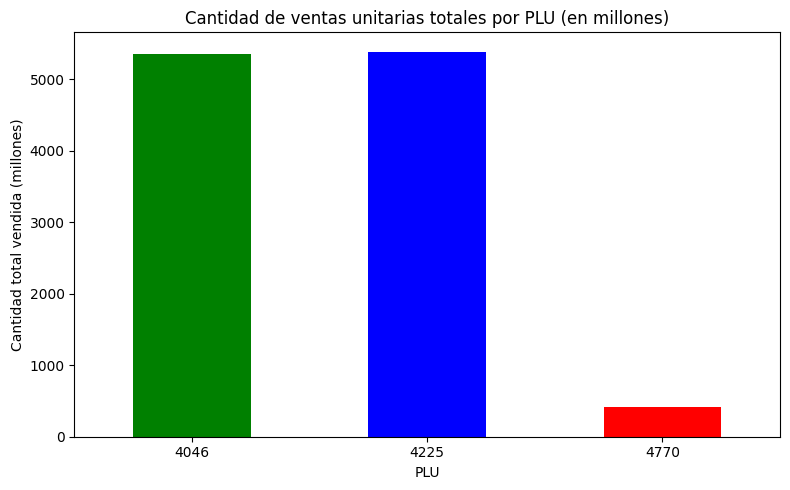

4046    5347.110739
4225    5386.275718
4770     416.802342
dtype: float64


In [18]:
##Cantidad de ventas unitarias totales por PLU (en millones)
plu_sales = df[['4046', '4225', '4770']].sum()

plu_sales_scaled = plu_sales / 1e6

plt.figure(figsize=(8, 5))
plu_sales_scaled.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Cantidad de ventas unitarias totales por PLU (en millones)')
plt.xlabel('PLU')
plt.ylabel('Cantidad total vendida (millones)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(plu_sales_scaled)


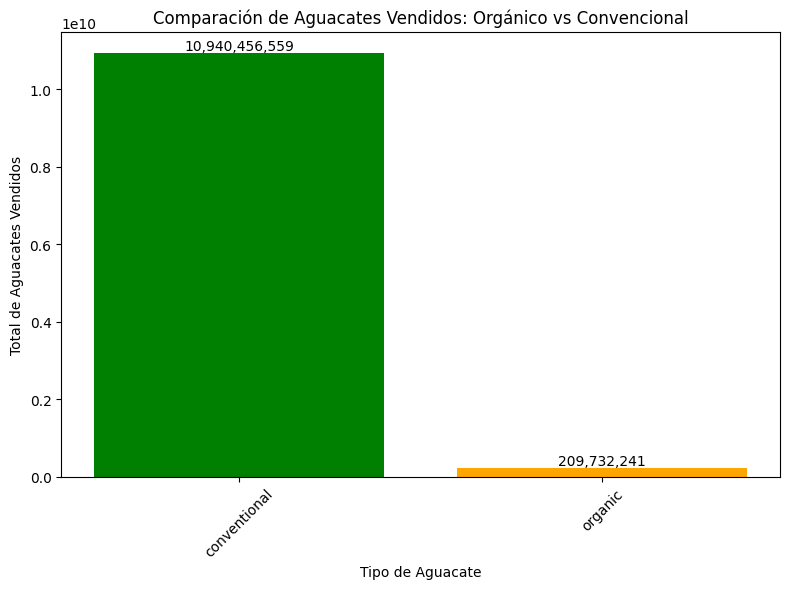

In [19]:
import matplotlib.pyplot as plt

#Tipo de aguacate más vendido
ventas_por_tipo = df.groupby('type').agg({
    '4046': 'sum',
    '4225': 'sum', 
    '4770': 'sum',  
    'Total Bags': 'sum'  
}).reset_index()

ventas_por_tipo['Total_Aguacates'] = ventas_por_tipo['4046'] + ventas_por_tipo['4225'] + ventas_por_tipo['4770']

plt.figure(figsize=(8, 6))
bars = plt.bar(ventas_por_tipo['type'], ventas_por_tipo['Total_Aguacates'], color=['green', 'orange'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparación de Aguacates Vendidos: Orgánico vs Convencional')
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Total de Aguacates Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [20]:
df.select_dtypes(include='number')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


<Figure size 1800x1200 with 0 Axes>

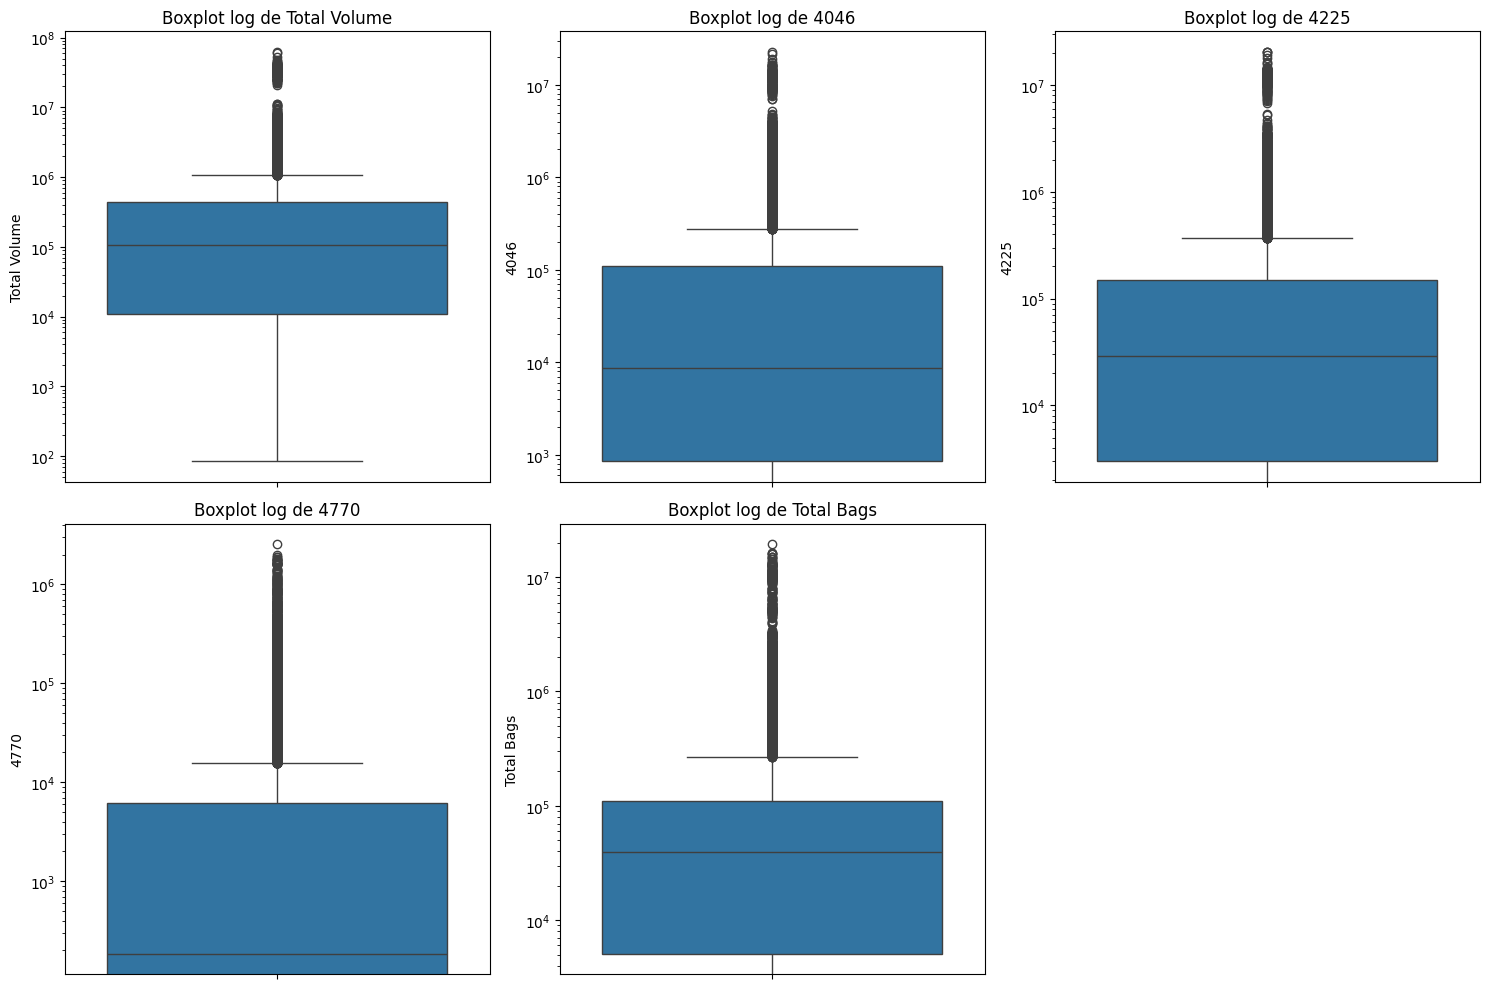

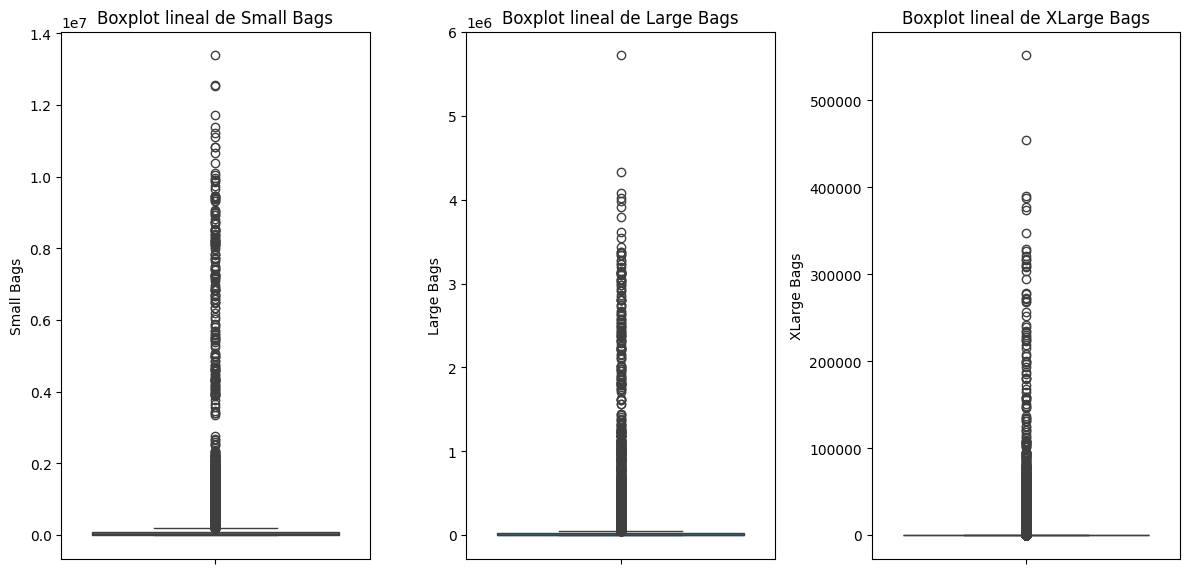

In [21]:
##Boxplots para buscar valores atípicos

col_log = ['Total Volume', '4046', '4225', '4770', 'Total Bags']
col_linear = ['Small Bags', 'Large Bags', 'XLarge Bags']


plt.figure(figsize=(18, 12))

# Log scale
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_log, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.yscale('log')
    plt.title(f'Boxplot log de {col}')
plt.tight_layout()
plt.show()

# Linear scale
plt.figure(figsize=(12, 6))
for i, col in enumerate(col_linear, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot lineal de {col}')
plt.tight_layout()
plt.show()


## PUNTO 2
# Limpieza y normalización de los datos

In [22]:
## Revisión de valores nulos
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [23]:
variables_numericas = df.select_dtypes(include='number').columns
variables_numericas = variables_numericas.drop('year', errors='ignore')


In [24]:
# Paso 2: Aplicar Z-score
df_zscore = df.copy()
df_zscore[variables_numericas] = df_zscore[variables_numericas].apply(zscore)

In [25]:
# Paso 3: Calcular IQR sobre datos estandarizados
Q1 = df_zscore[variables_numericas].quantile(0.25)
Q3 = df_zscore[variables_numericas].quantile(0.75)
IQR = Q3 - Q1

filtro = ~((df_zscore[variables_numericas] < (Q1 - 1.5 * IQR)) | 
           (df_zscore[variables_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df_zscore[filtro]

In [26]:
# Paso 5: Mostrar resultados
print(f'Número de filas eliminadas: {df.shape[0] - df_clean.shape[0]}')
print(f'Número de filas restantes: {df_clean.shape[0]}')

Número de filas eliminadas: 6711
Número de filas restantes: 11538


In [27]:
##Convertir varialbes categóricas a imbecilos
# Ver columnas categóricas
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['Date', 'type', 'region'], dtype='object')


In [28]:
#Convertir las variables categóricas a variables imbecilas
df_clean = pd.get_dummies(df_clean, columns=['type', 'region'], drop_first=True)

In [29]:
df_clean.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_organic', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'reg

In [30]:
nuevas_variables_numericas = df_clean.select_dtypes(include='number').columns

In [31]:
scaler_minmax = MinMaxScaler()
df_clean_normalized = scaler_minmax.fit_transform(df_clean[nuevas_variables_numericas])

In [32]:
df_clean_normalized = pd.DataFrame(df_clean_normalized, columns=nuevas_variables_numericas)

In [33]:
scaler_standard = StandardScaler()
df_clean_standardized = scaler_standard.fit_transform(df_clean[nuevas_variables_numericas])

In [34]:
df_clean_standardized = pd.DataFrame(df_clean_standardized, columns=nuevas_variables_numericas)

In [35]:
# Definir X (predictoras) y y (objetivo)
df_clean_standardized.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-0.560680,-0.089681,-0.427319,0.470878,-0.338219,-0.496785,-0.400388,-0.512184,-0.212099,-1.151294
1,-0.504577,-0.176013,-0.435912,0.294088,-0.333913,-0.473214,-0.373732,-0.511746,-0.212099,-1.151294
2,-1.682741,0.408257,-0.433057,1.455950,-0.303355,-0.512860,-0.418991,-0.511162,-0.212099,-1.151294
3,-1.261968,0.046422,-0.425060,0.786447,-0.327880,-0.580895,-0.497352,-0.507996,-0.212099,-1.151294
4,-0.700938,-0.211408,-0.429577,0.279672,-0.326525,-0.570029,-0.487117,-0.501386,-0.212099,-1.151294


In [36]:
X = df_clean.drop(columns=['type_organic', 'Date'])  # Eliminar variable objetivo y fecha
y = df_clean['type_organic']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression(max_iter=1000)

In [39]:
model.fit(X_train, y_train)

c:\Users\jhonn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9623


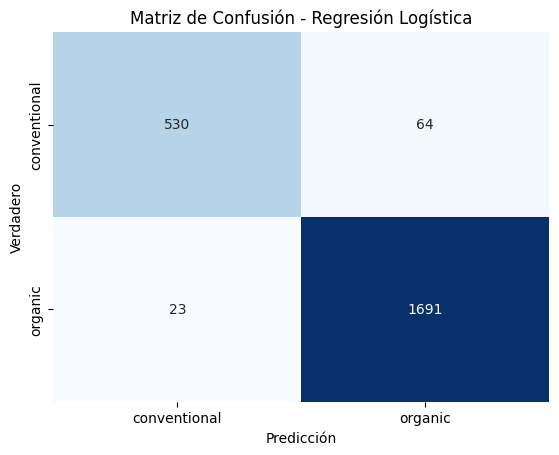

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['conventional', 'organic'], 
            yticklabels=['conventional', 'organic'], 
            cbar=False)

plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [46]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
